In [2]:
# Here we need to use the opendatasets Library to import data from Kaggle
import opendatasets as od
od.download('https://www.kaggle.com/datasets/knightbearr/sales-product-data')

Skipping, found downloaded files in "./sales-product-data" (use force=True to force download)


In [51]:
# Import relevant Libraries
import pandas as pd
import plotly.express as px
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# The data contains seperated fcsv iles, each file referred to a particular month
# Let's show as an example the sales data for the April month
sales_data_April = pd.read_csv('sales-product-data/Sales_April_2019.csv')
sales_data_April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Science questions to be answered

Q: What was the best month for sales? How much was earned that month?

Q: What City had the highest number of sales?

Q: What time should we display adverstisement to maximize likelihood of customer's buying product?

Q: What product sold the most? Why do you think it sold the most?



In [55]:
# First we need to read all csv files
mypath = 'sales-product-data'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [56]:
print(onlyfiles)

['Sales_January_2019.csv', 'Sales_November_2019.csv', 'Sales_April_2019.csv', 'Sales_June_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_March_2019.csv', 'Sales_December_2019.csv', 'Sales_July_2019.csv', 'Sales_September_2019.csv', 'Sales_February_2019.csv', 'Sales_October_2019.csv']


In [57]:
# Merge all csv files into one csv file
# Let's first make a pandas dataframe
all_sales_data = pd.DataFrame()
# Let's make a Loop to Merge the files
for file in onlyfiles:
    data = pd.read_csv('sales-product-data/'+file)
    all_sales_data = pd.concat([all_sales_data, data])

all_sales_data.to_csv('all_sales_data', index = False)

In [58]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [59]:
all_sales_data.shape

(186850, 6)

####  Data preprocessing

In [60]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [61]:
all_sales_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Handling missing values

In [62]:
# For the Order date column we can drop rows that has missing values
all_sales_data.dropna(subset = ['Order Date'], inplace = True)


In [63]:
all_sales_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [64]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [65]:
# we need to do more cleaning beacause some rows of the order date Column contains 'Or'
all_sales_data = all_sales_data[all_sales_data['Order Date'].str[0:2] != 'Or']

In [66]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [67]:
# Let's add first a month Column
all_sales_data['month'] = all_sales_data['Order Date'].str[0:2]

all_sales_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10
20378,278796,Wired Headphones,1,11.99,10/13/19 11:20,"547 Jefferson St, Los Angeles, CA 90001",10


In [68]:
all_sales_data['month'].dtypes

dtype('O')

In [69]:
# It's so important to change the dtypes of some columns
all_sales_data['month'] = all_sales_data['month'].astype('int32')

In [70]:
all_sales_data['month'].dtypes

dtype('int32')

In [71]:
all_sales_data['Quantity Ordered'].dtypes, all_sales_data['Price Each'].dtypes

(dtype('O'), dtype('O'))

In [72]:
# Make Quantity Ordered int
all_sales_data['Quantity Ordered'] = all_sales_data['Quantity Ordered'].astype('int32')

In [73]:
# make Quantity Ordered float
all_sales_data['Price Each']= all_sales_data['Price Each'].astype('float64')

In [74]:
# Add another Column called Sales to answer the first question
all_sales_data['Sales'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']

In [75]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00


In [76]:
all_sales_data_1 = all_sales_data

In [77]:
all_sales_data_1.to_csv('all_sales_data_1', index = False)

####  What was the best month for sales? How much was earned that Month?

In [78]:
grouped_data = all_sales_data.groupby(['month'])['Sales'].sum().reset_index(name = 'Sales')

In [79]:
grouped_data.sort_values(by = ['Sales'], ascending = False)

,month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


As you See the best month for sales is December

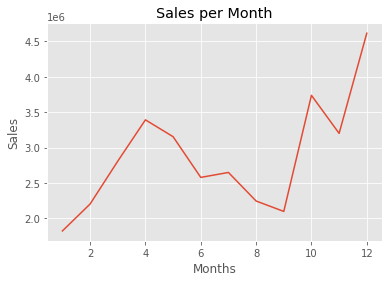

In [80]:
months = grouped_data['month']
sales = grouped_data['Sales']
plt.style.use('ggplot')
plt.plot(months, sales)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales per Month')
plt.show()

In [81]:
# Another way we can plot this is to use plotly.express
fig = px.line(grouped_data,
             x= 'month', y = 'Sales')
fig.update_traces(mode = 'lines')
fig.update_layout(title = 'Sales per Month',
                 xaxis_title = 'Months',
                 yaxis_title = 'Sales')
fig.show()

####  What City had the highest number of sales?

In [82]:
# here is a function that we are going to need to extract cities names from the Purchase adress Column
def get_city(stri):
    return stri.split(',')[1]

In [83]:
# Applying the function
all_sales_data['city'] = all_sales_data['Purchase Address'].apply(get_city)

In [84]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle


In [85]:
grouped_data1= all_sales_data.groupby(['city'])['Sales'].sum().reset_index(name = 'Sales')
grouped_data1

,city,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [86]:
grouped_data1.sort_values(by = ['Sales'], ascending = False)

,city,Sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


San Francisco is the city that has the highest number of sales

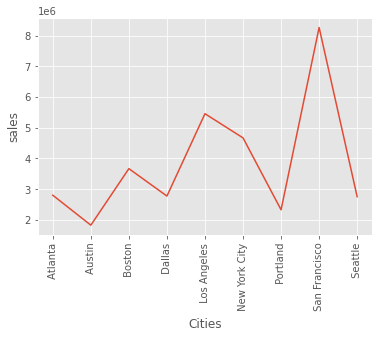

In [87]:
cities = grouped_data1['city']
sales = grouped_data1['Sales']
plt.plot(cities, sales)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees

plt.xlabel('Cities')
plt.ylabel('sales')
plt.show()

#### What time should we display adverstisement to maximize likelihood of customer's buying product?

In [88]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle


In [89]:
# we need to change the dtyoe to str so we can apply some strings methods
all_sales_data['Order Date'] = all_sales_data['Order Date'].astype('str')

In [90]:
def get_time(column):
    return column.split(' ')[1]

In [91]:
all_sales_data['Time'] = all_sales_data['Order Date'].apply(get_time)

In [92]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21:25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14:15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13:33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20:33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11:59
...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco,04:32
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles,22:00
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco,20:58
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle,17:21


In [93]:
all_sales_data['hour'] = pd.to_datetime(all_sales_data['Time']).dt.hour
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Time,hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21:25,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14:15,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13:33,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20:33,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11:59,11
...,...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco,04:32,4
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles,22:00,22
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco,20:58,20
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle,17:21,17


In [94]:
hours = [hour for hour, df in all_sales_data.groupby(['hour'])]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [95]:
 all_sales_data.groupby(['hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Time
hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


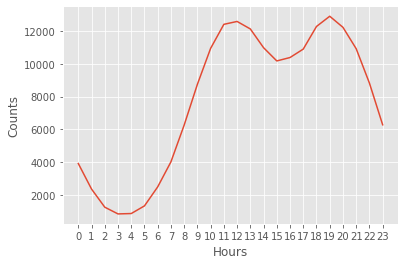

In [96]:
plt.plot(hours,  all_sales_data.groupby(['hour']).count()['Order ID'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.show()

#### What product sold the most? Why do you think it sold the most?

In [97]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Time,hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21:25,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14:15,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13:33,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20:33,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11:59,11


In [98]:
grouped_data4 = all_sales_data.groupby(['Product'])['Quantity Ordered'].sum().reset_index(name = 'Quantity Ordered')
grouped_data4

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [99]:
grouped_data4.sort_values(by=['Quantity Ordered'] , ascending = False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


AAA Batteries (4-pack) is the product that is sold the most

In [100]:
# Now let's plot the result
fig = px.bar(grouped_data4,
            x = 'Product', y= 'Quantity Ordered')
fig.update_layout(xaxis_title = 'Product',
                 yaxis_title = 'Quantity Ordered')
fig.show()